In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from math import pi
from random import randint
import numpy.random as rand
import matplotlib.colors as colors
cconverter=colors.ColorConverter()
from mpl_toolkits.mplot3d import Axes3D

In [7]:
def spot(r, f_surface, spot_ratio):
    
    lat = np.linspace(-np.pi/2, np.pi/2, 60)
    lon = np.linspace(-np.pi,   np.pi,  120)
    x3d = r * np.outer(np.cos(np.pi+lon), np.sin(np.pi/2 + lat))
    y3d = r * np.outer(np.sin(np.pi+lon), np.sin(np.pi/2 + lat))
    z3d = r * np.outer(np.ones(np.size(lon)), np.cos(np.pi/2 + lat))
    
    el_colors = np.full(x3d.shape, "y", dtype=str)
    N_elems = len(lat)*len(lon)
    N_spots = int(f_surface*N_elems)

    for n in range(N_spots):
        x_spot = rand.randint(0, x3d.shape[0])
        y_spot = rand.randint(0, x3d.shape[1])
        el_colors[x_spot, y_spot] = "r"
        
    brightness = []
    
    rot_angle = np.linspace(0, 2 * np.pi, 120)

    for zp in range(120):
        phi_0 = lon[zp]
        phi = np.linspace(phi_0 - np.pi/2, phi_0 + np.pi/2, 60)
        x = r * np.sin(phi - phi[0] - np.pi/2)
        y = r * np.sin(lat)
    
        dx = []
        dy = []
    
        spot_data = []
        df = []
    
        for q in range(len(x)-1):
            dx.append(np.absolute(x[q]-x[q+1]))
        for q in range(len(y)-1):
            dy.append(np.absolute(y[q]-y[q+1]))
    
        for i in range(len(dx)):
            k = zp -30 +i
            if (zp - 30 + i) < 0:
                k = 119 + (zp-30+i)
            elif (zp - 30 + i) > 119: 
                k = (zp -30 +i) - 119
            else:
                k = zp - 30 + i

            for j in range(len(dy)):
                dA = dx[i]*dy[j]
                if el_colors[k,j] == "r":
                    df.append((spot_ratio**4)*dA)
                else:
                    df.append(dA)
                           
        brightness.append(sum(df))
        
    return (1 - min(brightness)/max(brightness))

In [8]:
spot(100,.5,.75)

0.014659168741494533

In [12]:
brightness_data = []
for i in range(1000):
    brightness_data.append(spot(100,.5,.75))

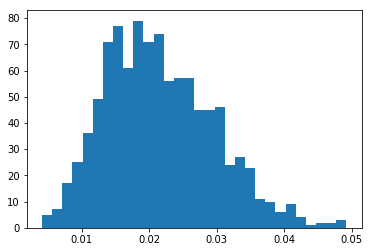

In [13]:
fig = plt.hist(brightness_data, bins = 30) 